<a href="https://colab.research.google.com/github/asengardeon/aprendizado_de_maquina/blob/master/Exercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Utilizando o conjunto de dados telco_customer_churn.csv, crie um modelo de classificação para fazer a previsão de churn dos clientes, dado o conjunto de atributos disponíveis. A solução deverá incluir uma análise exploratória dos dados, com a descrição das variáveis, visualização das distribuições e proporções, detecção de outliers e correlação entre as variáveis. Também deverá incluir o pré-processamento das variáveis, com a limpeza da base, discretização de variáveis contínuas, mapeamento one-hot das variáveis nominais, normalização dos valores, construção e comparação de modelos utilizando o estimador holdout ou cross-validation. Por fim, deverão ser apresentados os resultados do modelo, em termos de acurácia, precisão, cobertura e medida F. Também deverá ser apresentada a matriz de confusão.
Descrição das colunas:
1.	customerID: Identificador único do consumidor;
2.	gender: Se o gênero do consumidor é masculino ou feminino;
3.	SeniorCitizen: Se o consumidor é idoso;
4.	Partner: Se o consumidor possui um parceiro;
5.	Dependents: Se o consumidor possui dependentes;
6.	tenure: Número de meses que o consumidor ficou com a empresa;
7.	PhoneService: Se o consumidor possui um serviço de telefone;
8.	MultipleLines: Se o consumidor possui mais de uma linha de telefone;
9.	InternetService: Tipo de serviço de internet do consumidor;
10.	OnlineSecurity: Se o consumidor possui o serviço de segurança online;
11.	OnlineBackup: Se o consumidor possui o serviço de backup online;
12.	DeviceProtection: Se o consumidor possui o serviço de proteção de dispositivos;
13.	TechSupport: Se o consumidor possui suporte técnico;
14.	StreamingTV: Se o consumidor possui o serviço de tv por streaming;
15.	StreamingMovies: Se o consumidor possui o serviço de filmes por streaming;
16.	Contract: Tipo de contrato entre o consumidor e a empresa;
17.	ParperlessBilling: Se o consumidor possui fatura digital;
18.	PaymentMethod: Forma de pagamento;
19.	MonthlyCharges: Valor mensal da fatura;
20.	TotalCharges: Valor total cobrado do consumidor;
21.	Churn: Se o consumidor encerrou o contrato com a empresa


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import KBinsDiscretizer, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from matplotlib.cbook import boxplot_stats
from sklearn.linear_model import Lasso, LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import seaborn as sns
from sklearn.svm import LinearSVC,SVC





In [ ]:
df_churn = pd.read_csv('churn.csv', sep=',', decimal='.')
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


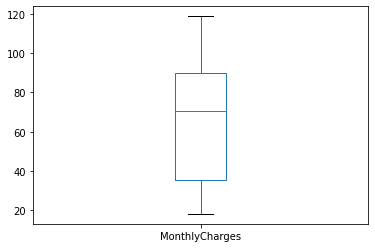

In [ ]:
df_churn.MonthlyCharges.plot.box()

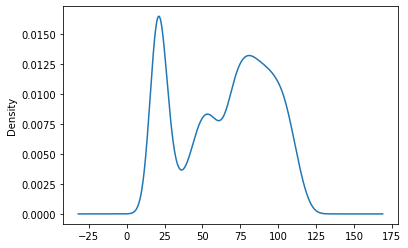

In [ ]:
df_churn.MonthlyCharges.plot.density()

In [ ]:
df_churn.TotalCharges.fillna(0)
  

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')

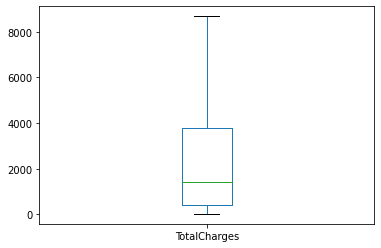

In [ ]:
df_churn.TotalCharges.plot.box()

### Com, a analise de valores mensais e totais abaixo podemos notar que o chrun esta mais  relacionado ao salario mensal e não ao total




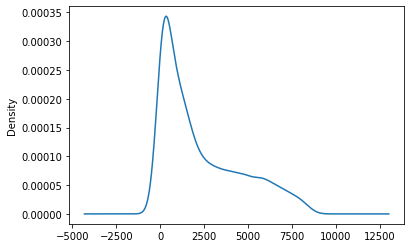

In [ ]:
df_churn.TotalCharges.plot.density()

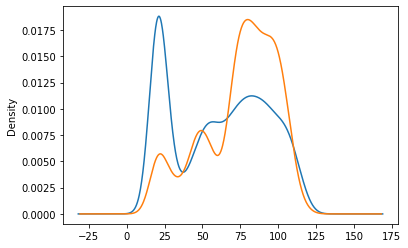

In [ ]:
df_churn.MonthlyCharges[df_churn.Churn == 'No'].plot.density() #Laranja
df_churn.MonthlyCharges[df_churn.Churn == 'Yes'].plot.density() #Azul

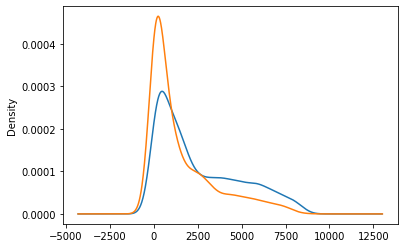

In [ ]:
df_churn.TotalCharges[df_churn.Churn == 'No'].plot.density() #Laranja
df_churn.TotalCharges[df_churn.Churn == 'Yes'].plot.density() #Azul

In [ ]:
df_churn.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

### Com relação ao modelos de contrato observamos  um comportamento semelhantes para os mdelos iguais

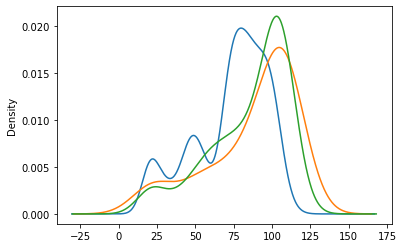

In [ ]:
df_churn.MonthlyCharges[df_churn.Churn == 'Yes'][df_churn.Contract == 'Month-to-month'].plot.density() #Laranja
df_churn.MonthlyCharges[df_churn.Churn == 'Yes'][df_churn.Contract == 'Two year'].plot.density() #Azul
df_churn.MonthlyCharges[df_churn.Churn == 'Yes'][df_churn.Contract == 'One year'].plot.density() #Verde

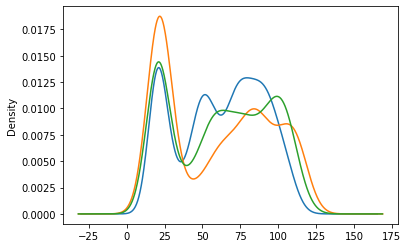

In [ ]:
df_churn.MonthlyCharges[df_churn.Churn == 'No'][df_churn.Contract == 'Month-to-month'].plot.density() #Laranja
df_churn.MonthlyCharges[df_churn.Churn == 'No'][df_churn.Contract == 'Two year'].plot.density() #Azul
df_churn.MonthlyCharges[df_churn.Churn == 'No'][df_churn.Contract == 'One year'].plot.density() #Verde

 Com relação ao tipo deinternet observamos  um comportamento semelhantes para os mdelos iguais

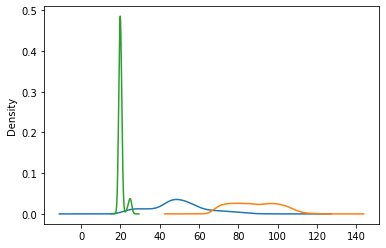

In [ ]:
df_churn.MonthlyCharges[df_churn.Churn == 'Yes'][df_churn.InternetService == 'DSL'].plot.density() #Laranja
df_churn.MonthlyCharges[df_churn.Churn == 'Yes'][df_churn.InternetService == 'Fiber optic'].plot.density() #Azul
df_churn.MonthlyCharges[df_churn.Churn == 'Yes'][df_churn.InternetService == 'No'].plot.density() #Verde

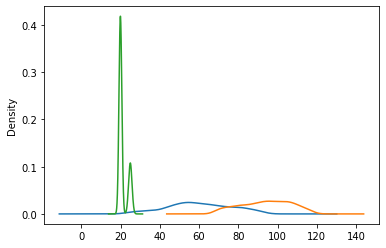

In [ ]:
df_churn.MonthlyCharges[df_churn.Churn == 'No'][df_churn.InternetService == 'DSL'].plot.density() #Laranja
df_churn.MonthlyCharges[df_churn.Churn == 'No'][df_churn.InternetService == 'Fiber optic'].plot.density() #Azul
df_churn.MonthlyCharges[df_churn.Churn == 'No'][df_churn.InternetService == 'No'].plot.density() #Verde

In [ ]:
df_churn.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

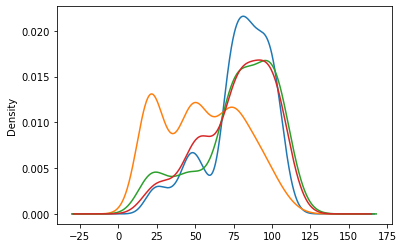

In [ ]:
df_churn.MonthlyCharges[df_churn.Churn == 'Yes'][df_churn.PaymentMethod == 'Electronic check'].plot.density() #Laranja
df_churn.MonthlyCharges[df_churn.Churn == 'Yes'][df_churn.PaymentMethod == 'Mailed check'].plot.density() #Azul
df_churn.MonthlyCharges[df_churn.Churn == 'Yes'][df_churn.PaymentMethod == 'Bank transfer (automatic)'].plot.density() #Verde
df_churn.MonthlyCharges[df_churn.Churn == 'Yes'][df_churn.PaymentMethod == 'Credit card (automatic)'].plot.density() #vermelho

Com relação a forma de pagamento  não tem elação com relação a taxa de churn

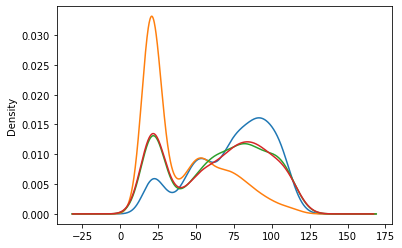

In [ ]:
df_churn.MonthlyCharges[df_churn.Churn == 'No'][df_churn.PaymentMethod == 'Electronic check'].plot.density() #Laranja
df_churn.MonthlyCharges[df_churn.Churn == 'No'][df_churn.PaymentMethod == 'Mailed check'].plot.density() #Azul
df_churn.MonthlyCharges[df_churn.Churn == 'No'][df_churn.PaymentMethod == 'Bank transfer (automatic)'].plot.density() #Verde
df_churn.MonthlyCharges[df_churn.Churn == 'No'][df_churn.PaymentMethod == 'Credit card (automatic)'].plot.density() #vermelho

In [ ]:
df_churn.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

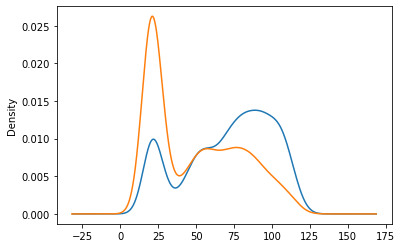

In [ ]:
df_churn.MonthlyCharges[df_churn.Churn == 'No'][df_churn.PaperlessBilling == 'Yes'].plot.density() #Laranja
df_churn.MonthlyCharges[df_churn.Churn == 'No'][df_churn.PaperlessBilling == 'No'].plot.density() #Azul

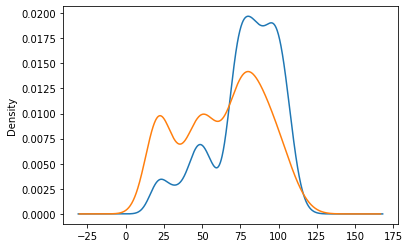

In [ ]:
df_churn.MonthlyCharges[df_churn.Churn == 'Yes'][df_churn.PaperlessBilling == 'Yes'].plot.density() #Verde
df_churn.MonthlyCharges[df_churn.Churn == 'Yes'][df_churn.PaperlessBilling == 'No'].plot.density() #vermelho

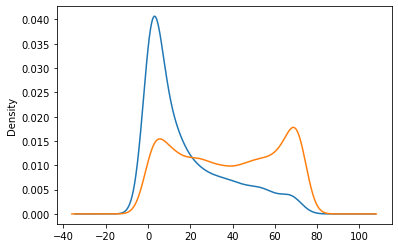

In [ ]:
df_churn.tenure[df_churn.Churn == 'Yes'].plot.density()
df_churn.tenure[df_churn.Churn == 'No'].plot.density()

In [ ]:
df_churn.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

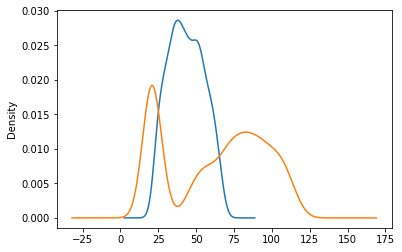

In [ ]:
df_churn.MonthlyCharges[df_churn.Churn == 'No'][df_churn.PhoneService == 'No'].plot.density() #Laranja
df_churn.MonthlyCharges[df_churn.Churn == 'No'][df_churn.PhoneService == 'Yes'].plot.density() #Azul

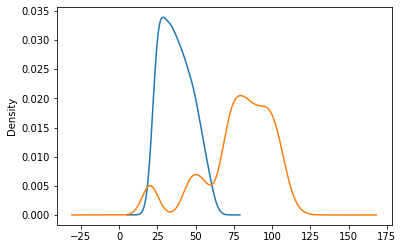

In [ ]:
df_churn.MonthlyCharges[df_churn.Churn == 'Yes'][df_churn.PhoneService == 'No'].plot.density() #Laranja
df_churn.MonthlyCharges[df_churn.Churn == 'Yes'][df_churn.PhoneService == 'Yes'].plot.density() #Azul

In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df_churn.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

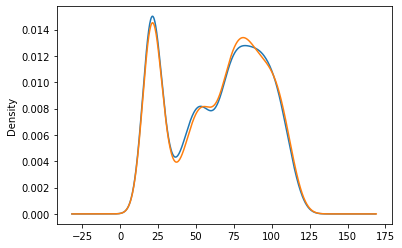

In [ ]:
df_churn.MonthlyCharges[df_churn.gender == 'Male'].plot.density()
df_churn.MonthlyCharges[df_churn.gender == 'Female'].plot.density()

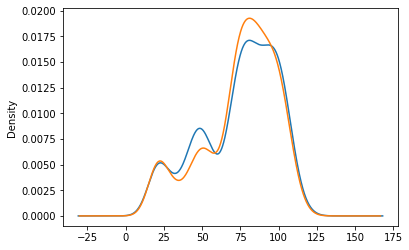

In [ ]:
df_churn.MonthlyCharges[df_churn.gender == 'Male'][df_churn.Churn == 'Yes'].plot.density()
df_churn.MonthlyCharges[df_churn.gender == 'Female'][df_churn.Churn == 'Yes'].plot.density()

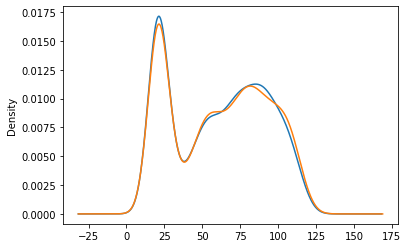

In [ ]:
df_churn.MonthlyCharges[df_churn.gender == 'Male'][df_churn.Churn == 'No'].plot.density()
df_churn.MonthlyCharges[df_churn.gender == 'Female'][df_churn.Churn == 'No'].plot.density()

In [ ]:
#Criar uma coluna nova omo boolean e em seguida converte para numerica
df_churn['churn_number'] = df_churn['Churn'] == 'Yes'
df_churn['churn_number'] = df_churn['churn_number'] * 1
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_number
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [ ]:
df_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
churn_number         0
dtype: int64

In [ ]:
#removi as series que não tem total pois vou precisar desta informação ja que ela se relaciona com o churn. 
df_churn.dropna(inplace = True)  
df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
churn_number        0
dtype: int64

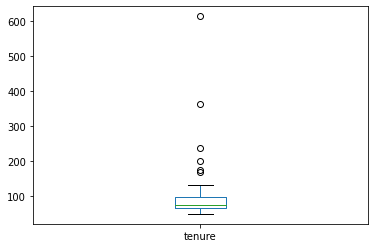

In [ ]:
df_churn.tenure.value_counts().plot.box()

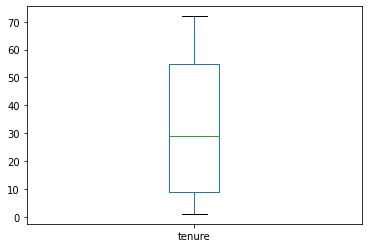

In [ ]:
stats = boxplot_stats(df_churn.tenure)[0]

df_churn = df_churn[df_churn.tenure <= stats['whishi']]
df_churn.tenure.plot.box()

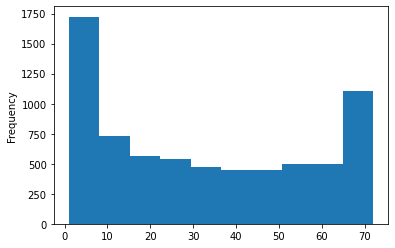

In [ ]:
df_churn.tenure.plot.hist()

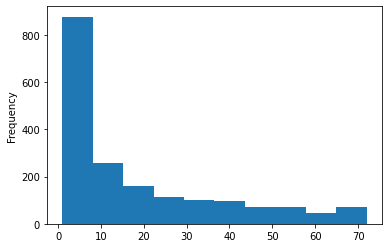

In [ ]:
df_churn.tenure[df_churn.Churn == 'Yes'].plot.hist()

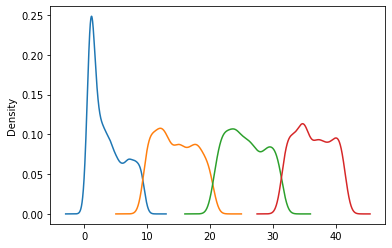

In [ ]:
#  def criar_faixas_tenure(t):
#     if t >= 70:
#         return '70'
#     if t >= 65:
#         return '65-70'    
#     elif t >= 60:
#         return '60-65'
#     elif t >= 47:
#         return '47-50'
#     elif t >= 45:
#         return '45-47'
#     elif t >= 40:
#         return '40-45'    
#     elif t >= 30:
#         return '30-40'
#     elif t >= 20:
#         return '20-30'
#     elif t >= 10:
#         return '10-20'
#     elif t >= 7:
#         return '7-10'
#     elif t >= 5:
#         return '5-7'
#     elif t >= 3:
#         return '3-5'    
#     elif t >= 1:
#         return '1-3'    
#     elif t >= 0:
#         return '0-1'    


# df_churn['faixa_tenure'] = df_churn['tenure'].apply(criar_faixas_tenure)  
# df_churn.faixa_tenure.value_counts()

discretizer = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='kmeans')
df_churn = df_churn.assign(faixa_tenure = discretizer.fit_transform(df_churn.tenure.values.reshape(-1, 1)))
df_churn.head()
[ df_churn[df_churn.faixa_tenure == i].tenure.plot.density() for i in range(4) ]

In [ ]:
df_dummies = df_churn.copy()
# df_dummies = df_dummies.drop(columns=)
columns = df_dummies.columns.drop(['customerID', 'gender',  'churn_number', 'tenure', 'TotalCharges', 'MonthlyCharges'])
# print(columns.values)
df_dummies = pd.get_dummies(df_churn, columns=columns.values)
columns = df_dummies.columns.drop(['customerID', 'churn_number', 'tenure', 'TotalCharges', 'MonthlyCharges'])
print(columns.values)
df_dummies.head()
# df_dummies.columns
# columns = ['faixa_tenure_1-3','faixa_tenure_10-20', 'faixa_tenure_20-30','faixa_tenure_3-5','faixa_tenure_30-40', 'faixa_tenure_40-45','faixa_tenure_45-47','faixa_tenure_47-50', 'faixa_tenure_5-7','faixa_tenure_60-65','faixa_tenure_65-70', 'faixa_tenure_7-10','faixa_tenure_70']

# df_model = df_churn.copy()
df_model = df_dummies.copy()
# df_model.head()
#plt.figure(figsize=(15,8))
#df_dummies.corr()['churn_number'].sort_values(ascending = False).plot(kind='bar')

['gender' 'SeniorCitizen_0' 'SeniorCitizen_1' 'Partner_No' 'Partner_Yes'
 'Dependents_No' 'Dependents_Yes' 'PhoneService_No' 'PhoneService_Yes'
 'MultipleLines_No' 'MultipleLines_No phone service' 'MultipleLines_Yes'
 'InternetService_DSL' 'InternetService_Fiber optic' 'InternetService_No'
 'OnlineSecurity_No' 'OnlineSecurity_No internet service'
 'OnlineSecurity_Yes' 'OnlineBackup_No' 'OnlineBackup_No internet service'
 'OnlineBackup_Yes' 'DeviceProtection_No'
 'DeviceProtection_No internet service' 'DeviceProtection_Yes'
 'TechSupport_No' 'TechSupport_No internet service' 'TechSupport_Yes'
 'StreamingTV_No' 'StreamingTV_No internet service' 'StreamingTV_Yes'
 'StreamingMovies_No' 'StreamingMovies_No internet service'
 'StreamingMovies_Yes' 'Contract_Month-to-month' 'Contract_One year'
 'Contract_Two year' 'PaperlessBilling_No' 'PaperlessBilling_Yes'
 'PaymentMethod_Bank transfer (automatic)'
 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check'
 'PaymentMethod_Mai

In [ ]:
df_dummies.head()

,customerID,gender,tenure,MonthlyCharges,TotalCharges,churn_number,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,faixa_tenure_0.0,faixa_tenure_1.0,faixa_tenure_2.0,faixa_tenure_3.0,faixa_tenure_4.0,faixa_tenure_5.0,faixa_tenure_6.0
0,7590-VHVEG,Female,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0
1,5575-GNVDE,Male,34,56.95,1889.50,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0
2,3668-QPYBK,Male,2,53.85,108.15,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0
3,7795-CFOCW,Male,45,42.30,1840.75,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,9237-HQITU,Female,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.1s finished


--------------------------------------------------
logistic_regression
--------------------------------------------------
Treino - Acurácia 1.0
Treino - Precisão 1.0
Treino - Cobertura 1.0
Treino - Medida F 1.0
--------------------------------------------------
Teste - Acurácia 1.0
Teste - Precisão 1.0
Teste - Cobertura 1.0
Teste - Medida F 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5163
           1       1.00      1.00      1.00      1869

    accuracy                           1.00      7032
   macro avg       1.00      1.00      1.00      7032
weighted avg       1.00      1.00      1.00      7032



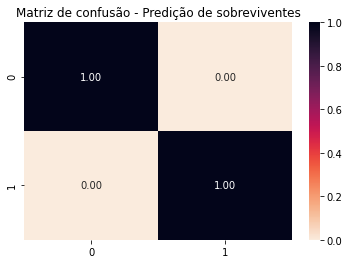

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    6.0s finished


--------------------------------------------------
decision_tree
--------------------------------------------------
Treino - Acurácia 1.0
Treino - Precisão 1.0
Treino - Cobertura 1.0
Treino - Medida F 1.0
--------------------------------------------------
Teste - Acurácia 1.0
Teste - Precisão 1.0
Teste - Cobertura 1.0
Teste - Medida F 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10326
           1       1.00      1.00      1.00      3738

    accuracy                           1.00     14064
   macro avg       1.00      1.00      1.00     14064
weighted avg       1.00      1.00      1.00     14064



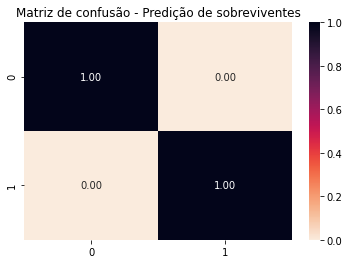

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.5min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.5min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.6min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.5min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.5min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.5min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.5min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.5min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.5min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.5min finished


--------------------------------------------------
random_forest
--------------------------------------------------
Treino - Acurácia 1.0
Treino - Precisão 1.0
Treino - Cobertura 1.0
Treino - Medida F 1.0
--------------------------------------------------
Teste - Acurácia 1.0
Teste - Precisão 1.0
Teste - Cobertura 1.0
Teste - Medida F 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15489
           1       1.00      1.00      1.00      5607

    accuracy                           1.00     21096
   macro avg       1.00      1.00      1.00     21096
weighted avg       1.00      1.00      1.00     21096



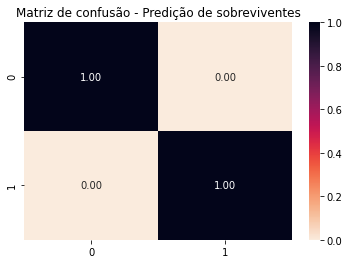

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   35.1s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   34.7s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   33.9s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   34.2s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   34.8s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   34.0s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   33.7s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   35.4s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   34.7s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   34.7s finished


--------------------------------------------------
knn
--------------------------------------------------
Treino - Acurácia 0.9950229104123874
Treino - Precisão 0.9979379384365294
Treino - Cobertura 0.9832342449464923
Treino - Medida F 0.9903990119145597
--------------------------------------------------
Teste - Acurácia 0.9749713080305187
Teste - Precisão 0.9857344867311639
Teste - Cobertura 0.9191938358921281
Teste - Medida F 0.9511940985155949

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20652
           1       1.00      0.98      0.99      7476

    accuracy                           0.99     28128
   macro avg       0.99      0.99      0.99     28128
weighted avg       0.99      0.99      0.99     28128



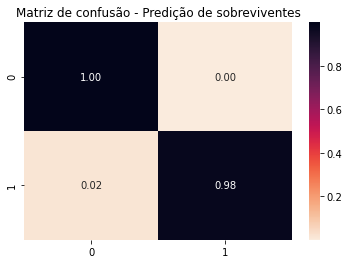

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.8min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.9min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.8min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.8min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.8min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.8min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.8min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.8min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.7min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.8min finished


--------------------------------------------------
svm
--------------------------------------------------
Treino - Acurácia 1.0
Treino - Precisão 1.0
Treino - Cobertura 1.0
Treino - Medida F 1.0
--------------------------------------------------
Teste - Acurácia 1.0
Teste - Precisão 1.0
Teste - Cobertura 1.0
Teste - Medida F 1.0

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25815
           1       1.00      0.98      0.99      9345

    accuracy                           0.99     35160
   macro avg       1.00      0.99      0.99     35160
weighted avg       1.00      0.99      0.99     35160



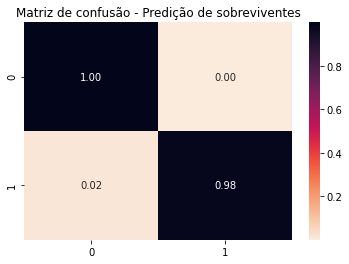

In [ ]:
fold_number = 10

def build_models(alg: str):
    model = None
    if alg == 'logistic_regression':
        model = GridSearchCV(
            LogisticRegression(n_jobs=-1),
            param_grid={
                'C': [0.0001, 0.001, 0.01, 0.1, 1],
                'class_weight': [None, 'balanced']
            },
            scoring='recall',
            cv=StratifiedKFold(fold_number),
            n_jobs=-1,
            verbose=1
        )
    elif alg == 'decision_tree':
        model = GridSearchCV(
            DecisionTreeClassifier(),
            param_grid={
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 2, 4, 8],
                'min_samples_split': [2, 4, 8],
                'class_weight': [None, 'balanced']
            },
            scoring='recall',
            cv=StratifiedKFold(fold_number),
            n_jobs=-1,
            verbose=1
        )
    elif alg == 'random_forest':
        model = GridSearchCV(
            RandomForestClassifier(n_estimators=50, n_jobs=-1),
            param_grid={
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 2, 4, 8],
                'min_samples_split': [2, 4, 8],
                'class_weight': [None, 'balanced']
            },
            scoring='recall',
            cv=StratifiedKFold(fold_number),
            n_jobs=-1,
            verbose=1
        )
    elif alg == 'knn':
        model = GridSearchCV(
            KNeighborsClassifier(n_jobs=-1),
            param_grid={
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance'],
            }, 
            scoring='recall',
            cv=StratifiedKFold(fold_number),
            n_jobs=-1,
            verbose=1
        )
    elif alg == 'svm':
        model = GridSearchCV(
            SVC(),
            param_grid={
                'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                'class_weight': [None, 'balanced'],
                'kernel': ['linear', 'poly']
            },
            scoring='f1',
            cv=StratifiedKFold(fold_number),
            n_jobs=-1,
            verbose=1
        )
    
    return model

def build_features(df_train, df_test):
    ohe = OneHotEncoder(sparse=False)
    ohe_train = ohe.fit_transform(df_train[columns.values]) # ['faixa_tenure', 'PaperlessBilling']
    ohe_test = ohe.transform(df_test[columns.values])

    mm = MinMaxScaler()
    mm_train = mm.fit_transform(df_train[['TotalCharges', 'MonthlyCharges']])
    mm_test = mm.transform(df_test[['TotalCharges', 'MonthlyCharges']])

    x_train = np.hstack([ohe_train, mm_train])
    x_test = np.hstack([ohe_test, mm_test])

    y_train = df_train.churn_number.values
    y_test = df_test.churn_number.values

    return x_train, y_train, x_test, y_test

algs = ['logistic_regression', 'decision_tree', 'random_forest', 'knn', 'svm'] 
results_matrix = np.zeros(shape=(len(algs), fold_number, 4, 2)) # shape = (algoritmo, fold, métrica, dataset)
ground_truth = list()
predicted = list()
for alg_index, alg in enumerate(algs):
    cv = StratifiedKFold(fold_number, shuffle=True)
    for fold, (train, test) in enumerate(cv.split(df_model, df_model.churn_number.values)):
        df_train = df_model.iloc[train]
        df_test = df_model.iloc[test]

        x_train, y_train, x_test, y_test = build_features(df_train, df_test)

        model = build_models(alg)
        model.fit(x_train, y_train)

        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)

        # acurácia, treino e teste
        results_matrix[alg_index, fold, 0, 0] = accuracy_score(y_train, y_pred_train)
        results_matrix[alg_index, fold, 0, 1] = accuracy_score(y_test, y_pred_test)

        p_train, r_train, f_train, _ = precision_recall_fscore_support(y_train, y_pred_train, average='binary')
        p_test, r_test, f_test, _ = precision_recall_fscore_support(y_test, y_pred_test, average='binary')

        # precisão, treino e teste
        results_matrix[alg_index, fold, 1, 0] = p_train
        results_matrix[alg_index, fold, 1, 1] = p_test

        # cobertura, treino e teste
        results_matrix[alg_index, fold, 2, 0] = r_train
        results_matrix[alg_index, fold, 2, 1] = r_test

        # fscore, treino e teste
        results_matrix[alg_index, fold, 3, 0] = f_train
        results_matrix[alg_index, fold, 3, 1] = f_test

        ground_truth.extend(y_test)
        predicted.extend(y_pred_test)
    
    print('-' * 50)
    print(alg)
    print('-' * 50)
    print('Treino - Acurácia', results_matrix[alg_index,:,0,0].mean())
    print('Treino - Precisão', results_matrix[alg_index,:,1,0].mean())
    print('Treino - Cobertura', results_matrix[alg_index,:,2,0].mean())
    print('Treino - Medida F', results_matrix[alg_index,:,3,0].mean())
    print('-' * 50)
    print('Teste - Acurácia', results_matrix[alg_index,:,0,1].mean())
    print('Teste - Precisão', results_matrix[alg_index,:,1,1].mean())
    print('Teste - Cobertura', results_matrix[alg_index,:,2,1].mean())
    print('Teste - Medida F', results_matrix[alg_index,:,3,1].mean())
    print()


    print(classification_report(ground_truth, predicted))

    # normalizando a matriz de confusão para visualizar o resultado da cobertura
    cm = confusion_matrix(ground_truth, predicted)
    cm = np.transpose(cm.T / cm.astype(np.float).sum(axis=1))

    plt.title('Matriz de confusão - Predição de sobreviventes')
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='rocket_r')
    plt.show()

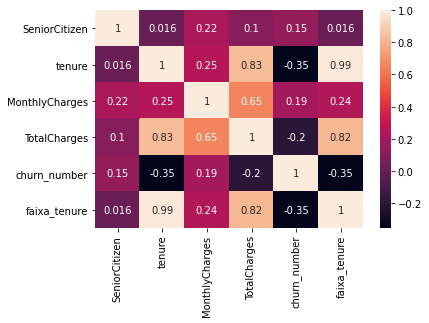

In [ ]:
sns.heatmap(df_churn.corr(), annot = True)



RESULTADO DA EXECUÇÂO
-- 
logistic_regression
--
Treino - Acurácia 1.0  
Treino - Precisão 1.0  
Treino - Cobertura 1.0  
Treino - Medida F 1.0  

--------------------------------------------------
Teste - Acurácia 1.0    
Teste - Precisão 1.0    
Teste - Cobertura 1.0    
Teste - Medida F 1.0   


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5163
           1       1.00      1.00      1.00      1869

    accuracy                           1.00      7032
   macro avg       1.00      1.00      1.00      7032
weighted avg       1.00      1.00      1.00      7032

--------------------------------------------------
decision_tree
--------------------------------------------------
Treino - Acurácia 1.0  
Treino - Precisão 1.0  
Treino - Cobertura 1.0  
Treino - Medida F 1.0  
--------------------------------------------------
Teste - Acurácia 1.0  
Teste - Precisão 1.0  
Teste - Cobertura 1.0  
Teste - Medida F 1.0  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10326
           1       1.00      1.00      1.00      3738

    accuracy                           1.00     14064
   macro avg       1.00      1.00      1.00     14064
weighted avg       1.00      1.00      1.00     14064

--------------------------------------------------
random_forest
--------------------------------------------------
Treino - Acurácia 1.0  
Treino - Precisão 1.0  
Treino - Cobertura 1.0  
Treino - Medida F 1.0  
--------------------------------------------------
Teste - Acurácia 1.0  
Teste - Precisão 1.0  
Teste - Cobertura 1.0  
Teste - Medida F 1.0  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15489
           1       1.00      1.00      1.00      5607

    accuracy                           1.00     21096
   macro avg       1.00      1.00      1.00     21096
weighted avg       1.00      1.00      1.00     21096

--------------------------------------------------
knn
--------------------------------------------------
Treino - Acurácia 0.9950229104123874  
Treino - Precisão 0.9979379384365294  
Treino - Cobertura 0.9832342449464923  
Treino - Medida F 0.9903990119145597  
--------------------------------------------------
Teste - Acurácia 0.9749713080305187  
Teste - Precisão 0.9857344867311639  
Teste - Cobertura 0.9191938358921281  
Teste - Medida F 0.9511940985155949  

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20652
           1       1.00      0.98      0.99      7476

    accuracy                           0.99     28128
   macro avg       0.99      0.99      0.99     28128
weighted avg       0.99      0.99      0.99     28128

--------------------------------------------------
svm
--------------------------------------------------
Treino - Acurácia 1.0  
Treino - Precisão 1.0  
Treino - Cobertura 1.0  
Treino - Medida F 1.0  
--------------------------------------------------
Teste - Acurácia 1.0  
Teste - Precisão 1.0  
Teste - Cobertura 1.0  
Teste - Medida F 1.0  

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25815
           1       1.00      0.98      0.99      9345

    accuracy                           0.99     35160
   macro avg       1.00      0.99      0.99     35160
weighted avg       1.00      0.99      0.99     35160

